# Data Science Bootcamp
# <center> **Aula 07 -- Data Imputation**

# Introduction

In this tutorial we will explore some basic techniques of data imputation, that is, how to fill missing values in a dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

In [2]:
pd.set_option('max_rows', 30)

In [3]:
data = pd.read_csv('../../Ciencia de Datos/Code/som/hpi-data-2016.csv')

# Missing data

Entries missing values are given the value `NaN`, short for "Not a Number". For technical reasons these `NaN` values are always of the `float64` dtype.

Pandas provides some methods specific to missing data. To select `NaN` entries you can use `pd.isnull()` (or its companion `pd.notnull()`). This is meant to be used thusly:

In [4]:
data.isnull().sum()

Country                                 0
Region                                  0
Average-Life-Expectancy                 0
Average-Wellbeing_(0-10)                0
Happy-Life-Years                        0
Footprint_(gha/capita)                  0
Inequality-of-Outcomes                  0
Inequality-adjusted-Life-Expectancy     0
Inequality-adjusted-Wellbeing           0
Happy-Planet-Index                      0
GDP/capita($PPP)                        0
Population                              0
GINI-index                             75
dtype: int64

Replacing missing values is a common operation.  Pandas provides a really handy method for this problem: `fillna()`. `fillna()` provides a few different strategies for mitigating such data. For example, we can simply replace each `NaN` with an `"Unknown"`:

In [5]:
data['GINI-index'].fillna("Unknown")

0      Unknown
1           29
2      Unknown
3         42.5
4         30.5
        ...   
135    Unknown
136       38.7
137    Unknown
138    Unknown
139    Unknown
Name: GINI-index, Length: 140, dtype: object

In [6]:
data

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,NaN
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.0
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,NaN
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.5
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,Americas,73.9,7.1,41.5,3.6,0.19,65.5,6.5,33.6,12772,29854238,NaN
136,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,0.19,64.8,5.2,40.3,1755,88809200,38.7
137,Yemen,Middle East and North Africa,63.3,4.1,15.2,1.0,0.39,44.7,3.6,22.8,1289,24882792,NaN
138,Zambia,Sub Saharan Africa,58.4,5.0,16.7,1.0,0.41,38.7,4.5,25.2,1687,14786581,NaN


## Fill with zeros

In [7]:
## reemplazar con 0
data2 = data.copy()
data2['GINI-index'] = data2['GINI-index'].fillna(0)

In [8]:
data2

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,0.0
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.0
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,0.0
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.5
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,Americas,73.9,7.1,41.5,3.6,0.19,65.5,6.5,33.6,12772,29854238,0.0
136,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,0.19,64.8,5.2,40.3,1755,88809200,38.7
137,Yemen,Middle East and North Africa,63.3,4.1,15.2,1.0,0.39,44.7,3.6,22.8,1289,24882792,0.0
138,Zambia,Sub Saharan Africa,58.4,5.0,16.7,1.0,0.41,38.7,4.5,25.2,1687,14786581,0.0


In [9]:
data['GINI-index'].mean()

36.52

In [10]:
data2['GINI-index'].mean()

16.955714285714286

## Fill with statistical resumes

In [11]:
## reemplazar con la media

data3 = data.copy()
media = data3['GINI-index'].mean()

data3['GINI-index'] = data3['GINI-index'].fillna(media)

In [12]:
data3

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,36.52
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.00
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,36.52
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.50
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,Americas,73.9,7.1,41.5,3.6,0.19,65.5,6.5,33.6,12772,29854238,36.52
136,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,0.19,64.8,5.2,40.3,1755,88809200,38.70
137,Yemen,Middle East and North Africa,63.3,4.1,15.2,1.0,0.39,44.7,3.6,22.8,1289,24882792,36.52
138,Zambia,Sub Saharan Africa,58.4,5.0,16.7,1.0,0.41,38.7,4.5,25.2,1687,14786581,36.52


In [13]:
data3['GINI-index'].mean()

36.52

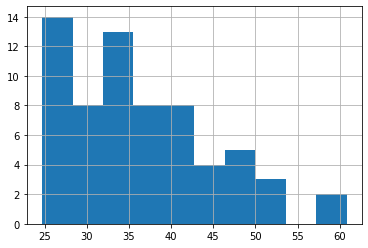

In [14]:
data['GINI-index'].hist()

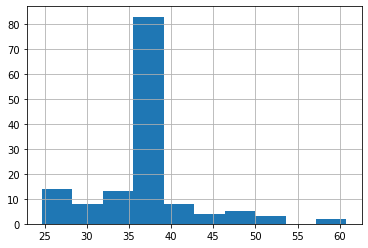

In [15]:
data3['GINI-index'].hist()

In [16]:
# reemplazar con la mediana

mediana = data['GINI-index'].median()
print(mediana)
data3['GINI-index'] = data3['GINI-index'].fillna(mediana)

35.2


In [17]:
moda = data['Region'].mode()
print(moda)

0    Sub Saharan Africa
dtype: object


In [18]:
moda = data['GINI-index'].mode()
print(moda)

0    26.1
1    27.3
2    27.4
3    30.5
4    35.2
5    36.0
6    38.7
7    45.1
dtype: float64


In [19]:
data['GINI-index'].value_counts()

27.3    2
45.1    2
38.7    2
35.2    2
26.1    2
       ..
41.3    1
39.3    1
25.9    1
45.7    1
29.0    1
Name: GINI-index, Length: 57, dtype: int64

## Fill with group or cluster mean 

Sometimes it is more convenient to replace missing values with group means, where the groups correspond to some categorial variable values, or some clustering scheme.

In [20]:
regions = data.Region.unique()
regions

array(['Middle East and North Africa', 'Post-communist', 'Americas',
       'Asia Pacific', 'Europe', 'Sub Saharan Africa'], dtype=object)

In [21]:
means = data.groupby('Region')['GINI-index'].mean().values
means

array([48.72666667, 37.55714286, 31.39444444, 34.85      , 30.95789474,
       39.25      ])

In [22]:
data3 = data.copy()
data3['GINI-index'] = data3['GINI-index'].fillna(data3.groupby('Region')['GINI-index'].transform('mean'))
data3

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,34.850000
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.000000
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,34.850000
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.500000
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,Americas,73.9,7.1,41.5,3.6,0.19,65.5,6.5,33.6,12772,29854238,48.726667
136,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,0.19,64.8,5.2,40.3,1755,88809200,38.700000
137,Yemen,Middle East and North Africa,63.3,4.1,15.2,1.0,0.39,44.7,3.6,22.8,1289,24882792,34.850000
138,Zambia,Sub Saharan Africa,58.4,5.0,16.7,1.0,0.41,38.7,4.5,25.2,1687,14786581,39.250000


## Fill with linear regression estimations

In [23]:
data.corr()

,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
Average-Life-Expectancy,1.000000,0.684597,0.874994,0.621546,-0.933635,0.982560,0.670472,0.540539,0.620792,0.013189,-0.329860
Average-Wellbeing_(0-10),0.684597,1.000000,0.929916,0.669626,-0.756944,0.696176,0.994429,0.509647,0.710701,-0.023479,-0.158217
Happy-Life-Years,0.874994,0.929916,1.000000,0.748900,-0.919483,0.889390,0.930779,0.499604,0.796483,-0.027091,-0.357976
Footprint_(gha/capita),0.621546,0.669626,0.748900,1.000000,-0.717209,0.668154,0.681618,-0.130605,0.796346,-0.056481,-0.424435
Inequality-of-Outcomes,-0.933635,-0.756944,-0.919483,-0.717209,1.000000,-0.971618,-0.757822,-0.464021,-0.668670,0.001681,0.579074
Inequality-adjusted-Life-Expectancy,0.982560,0.696176,0.889390,0.668154,-0.971618,1.000000,0.682141,0.487741,0.642361,-0.001109,-0.470139
Inequality-adjusted-Wellbeing,0.670472,0.994429,0.930779,0.681618,-0.757822,0.682141,1.000000,0.486368,0.730921,-0.023779,-0.211804
Happy-Planet-Index,0.540539,0.509647,0.499604,-0.130605,-0.464021,0.487741,0.486368,1.000000,0.114016,0.066213,0.245163
GDP/capita($PPP),0.620792,0.710701,0.796483,0.796346,-0.668670,0.642361,0.730921,0.114016,1.000000,-0.051025,-0.401849
Population,0.013189,-0.023479,-0.027091,-0.056481,0.001681,-0.001109,-0.023779,0.066213,-0.051025,1.000000,0.301755


<Figure size 432x288 with 0 Axes>

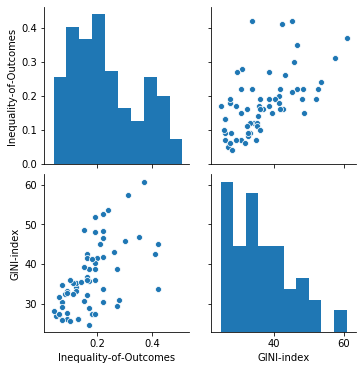

In [24]:
plt.figure()
sns.pairplot(data[['Inequality-of-Outcomes', 'GINI-index']])
plt.show()

In [25]:
datadropna = data.dropna()

In [26]:
datadropna

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.0
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.5
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.5
6,Austria,Europe,81.0,7.4,54.4,6.1,0.07,78.0,7.1,30.5,48324,8429991,30.5
8,Belarus,Post-communist,70.9,5.7,34.0,5.1,0.13,66.7,5.3,21.7,6722,9464000,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Uganda,Sub Saharan Africa,57.1,4.3,13.8,1.2,0.41,36.8,3.9,19.4,656,35400620,42.4
129,Ukraine,Post-communist,70.3,5.0,28.3,2.8,0.17,64.2,4.6,26.4,3855,45593300,24.7
130,United Kingdom,Europe,80.4,6.9,49.1,4.9,0.09,76.8,6.6,31.9,41295,63700300,32.6
132,Uruguay,Americas,76.9,6.4,39.4,2.9,0.18,69.6,5.8,36.1,15128,3396753,41.3


In [27]:
x = datadropna['Inequality-of-Outcomes'].values
y = datadropna['GINI-index'].values

In [28]:
x

array([0.17, 0.16, 0.22, 0.07, 0.13, 0.09, 0.27, 0.35, 0.22, 0.19, 0.28,
       0.24, 0.15, 0.12, 0.09, 0.07, 0.42, 0.3 , 0.22, 0.22, 0.12, 0.06,
       0.09, 0.2 , 0.16, 0.42, 0.37, 0.31, 0.15, 0.05, 0.27, 0.08, 0.12,
       0.18, 0.18, 0.14, 0.11, 0.07, 0.17, 0.19, 0.22, 0.16, 0.04, 0.07,
       0.19, 0.22, 0.21, 0.26, 0.11, 0.16, 0.19, 0.16, 0.13, 0.1 , 0.1 ,
       0.17, 0.06, 0.06, 0.15, 0.19, 0.41, 0.17, 0.09, 0.18, 0.19])

In [29]:
y

array([29. , 42.5, 30.5, 30.5, 26. , 27.6, 38.7, 46.7, 52.7, 36. , 30.8,
       53.5, 48.6, 34.3, 26.1, 29.1, 45.1, 45.7, 46.6, 41.8, 33.2, 27.1,
       33.1, 41.4, 36.7, 33.7, 60.8, 57.4, 30.6, 26.9, 29.5, 32.5, 35.2,
       27.4, 27.4, 35.5, 35.2, 34.8, 35.8, 48.1, 33.8, 32.2, 28. , 25.9,
       51.9, 48.2, 45.1, 43. , 32.4, 36. , 27.3, 41.6, 26.1, 25.6, 35.9,
       38.6, 27.3, 31.6, 39.3, 40.2, 42.4, 24.7, 32.6, 41.3, 38.7])

In [30]:
x.shape

(65,)

In [31]:
n = x.shape[0]
n

65

In [32]:
# construct design matrix

X = np.stack([np.ones(n), x]).T
X.shape

(65, 2)

In [33]:
# compute linear regression coefficients

c = np.linalg.inv(X.T @ X) @ (X.T) @ y

In [34]:
c

array([26.88757292, 54.87359863])

In [35]:
def regresion(x, c):
    yhat = c @ np.hstack([np.array([1.]), x])
    return yhat

In [36]:
data4 = data.copy()

In [37]:
data4

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,NaN
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.0
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,NaN
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.5
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,Americas,73.9,7.1,41.5,3.6,0.19,65.5,6.5,33.6,12772,29854238,NaN
136,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,0.19,64.8,5.2,40.3,1755,88809200,38.7
137,Yemen,Middle East and North Africa,63.3,4.1,15.2,1.0,0.39,44.7,3.6,22.8,1289,24882792,NaN
138,Zambia,Sub Saharan Africa,58.4,5.0,16.7,1.0,0.41,38.7,4.5,25.2,1687,14786581,NaN


In [38]:
for i in range(0, data4.shape[0]):
    if np.isnan(data4['GINI-index'][i]):
        y = regresion(data4['Inequality-of-Outcomes'][i], c)
        data4['GINI-index'][i] = y

C:\Users\Alan\Anaconda3\envs\tf2.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
data4

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,50.483220
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.000000
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,40.057237
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.500000
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,Americas,73.9,7.1,41.5,3.6,0.19,65.5,6.5,33.6,12772,29854238,37.313557
136,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,0.19,64.8,5.2,40.3,1755,88809200,38.700000
137,Yemen,Middle East and North Africa,63.3,4.1,15.2,1.0,0.39,44.7,3.6,22.8,1289,24882792,48.288276
138,Zambia,Sub Saharan Africa,58.4,5.0,16.7,1.0,0.41,38.7,4.5,25.2,1687,14786581,49.385748


## K nearest neighbour imputation

In [40]:
from sklearn.impute import KNNImputer

In [41]:
# define imputer
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')

In [42]:
X = data.iloc[:,2:].values

# fit
imputer.fit(X)

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=10, weights='uniform')

In [43]:
# transform the dataset
Xtrans = imputer.transform(X)

In [44]:
data4 = data.copy()
data4['GINI-index'] = imputer.transform(X)[:,-1]

In [45]:
data4

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,35.98
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.00
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,37.19
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.50
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,Americas,73.9,7.1,41.5,3.6,0.19,65.5,6.5,33.6,12772,29854238,35.98
136,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,0.19,64.8,5.2,40.3,1755,88809200,38.70
137,Yemen,Middle East and North Africa,63.3,4.1,15.2,1.0,0.39,44.7,3.6,22.8,1289,24882792,34.81
138,Zambia,Sub Saharan Africa,58.4,5.0,16.7,1.0,0.41,38.7,4.5,25.2,1687,14786581,35.37


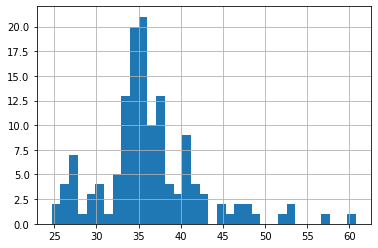

In [46]:
data4['GINI-index'].hist(bins=35)

## Another example

In [47]:
horses = pd.read_csv('horse-colic.csv', header=0)

In [48]:
horses

,surgery,age,hospital,rectal-temp,pulse,respiratory-rate,extremities-temp,peripheral-pulse,mucous-membranes,capillary-refill-time,...,total-protein,abdominocentesis-appearance,abdomcentesis-total-protein,outcome,surgical-lesion,site-of-lesion,type,subtype,specific,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,8.4,NaN,NaN,2.0,2,11300,0,0,2,NaN
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,85.0,2.0,2.0,3.0,2,2208,0,0,2,NaN
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,6.7,NaN,NaN,1.0,2,0,0,0,1,NaN
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,7.2,3.0,5.3,2.0,1,2208,0,0,1,NaN
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,7.4,NaN,NaN,2.0,2,4300,0,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,65.0,NaN,NaN,3.0,2,3205,0,0,2,NaN
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,NaN,3.0,3.3,3.0,1,2208,0,0,1,NaN
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,6.8,NaN,NaN,2.0,1,3205,0,0,2,NaN
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,6.0,3.0,3.4,1.0,1,2208,0,0,1,NaN


In [49]:
horses.isna().sum()

surgery                          1
age                              0
hospital                         0
rectal-temp                     60
pulse                           24
respiratory-rate                58
extremities-temp                56
peripheral-pulse                69
mucous-membranes                47
capillary-refill-time           32
pain                            55
peristalsis                     44
abdominal-distension            56
nasogastric-tube               104
nasogastric-reflux             106
nasogastric-reflux-PH          247
rectal-examination             102
abdomen                        118
packed-cell-volume              29
total-protein                   33
abdominocentesis-appearance    165
abdomcentesis-total-protein    198
outcome                          1
surgical-lesion                  0
site-of-lesion                   0
type                             0
subtype                          0
specific                         0
cp_data             

In [50]:
# define imputer
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')

In [51]:
X = horses.iloc[:,:-1].values
print(X.shape)

# fit
imputer.fit(X)

(300, 28)


KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=10, weights='uniform')

In [52]:
# transform the dataset
Xtrans = imputer.transform(X)

In [53]:
horses2 = horses.copy()
horses2.iloc[:,:-1] = Xtrans

In [54]:
horses2

,surgery,age,hospital,rectal-temp,pulse,respiratory-rate,extremities-temp,peripheral-pulse,mucous-membranes,capillary-refill-time,...,total-protein,abdominocentesis-appearance,abdomcentesis-total-protein,outcome,surgical-lesion,site-of-lesion,type,subtype,specific,cp_data
0,2.0,1.0,530101.0,38.50,66.0,28.0,3.0,3.0,2.2,2.0,...,8.40,2.5,3.26,2.0,2.0,11300.0,0.0,0.0,2.0,NaN
1,1.0,1.0,534817.0,39.20,88.0,20.0,3.0,2.3,4.0,1.0,...,85.00,2.0,2.00,3.0,2.0,2208.0,0.0,0.0,2.0,NaN
2,2.0,1.0,530334.0,38.30,40.0,24.0,1.0,1.0,3.0,1.0,...,6.70,1.8,4.98,1.0,2.0,0.0,0.0,0.0,1.0,NaN
3,1.0,9.0,5290409.0,39.10,164.0,84.0,4.0,1.0,6.0,2.0,...,7.20,3.0,5.30,2.0,1.0,2208.0,0.0,0.0,1.0,NaN
4,2.0,1.0,530255.0,37.30,104.0,35.0,2.5,2.4,6.0,2.0,...,7.40,2.0,2.78,2.0,2.0,4300.0,0.0,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1.0,533886.0,38.06,120.0,70.0,4.0,2.5,4.0,2.0,...,65.00,2.2,1.70,3.0,2.0,3205.0,0.0,0.0,2.0,NaN
296,2.0,1.0,527702.0,37.20,72.0,24.0,3.0,2.0,4.0,2.0,...,7.32,3.0,3.30,3.0,1.0,2208.0,0.0,0.0,1.0,NaN
297,1.0,1.0,529386.0,37.50,72.0,30.0,4.0,3.0,4.0,1.0,...,6.80,1.6,4.63,2.0,1.0,3205.0,0.0,0.0,2.0,NaN
298,1.0,1.0,530612.0,36.50,100.0,24.0,3.0,3.0,3.0,1.0,...,6.00,3.0,3.40,1.0,1.0,2208.0,0.0,0.0,1.0,NaN


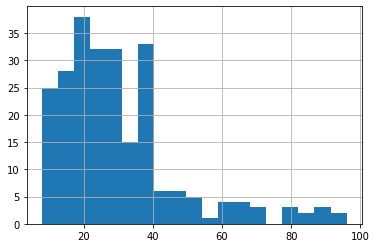

In [55]:
horses['respiratory-rate'].hist(bins=19)

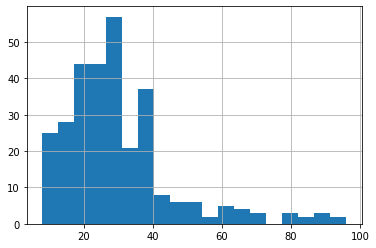

In [56]:
horses2['respiratory-rate'].hist(bins=19)